In [1]:
# Ejecutar para que funcione el parse_latex en google colab
 
# !pip install sympy==1.5 antlr4-python3-runtime==4.7.1

In [2]:
from sympy import init_session
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display

init_session()

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [3]:
def latex_exam(question, parts):
    tex=r"\question "+question+r"\begin{parts} "
    for p in parts :
        tex+=r"\part[1] "+p[0]+r"\begin{solution} "+p[1]+r"\end{solution} " 
    tex+=r"\end{parts} "
    
    return tex

def mostrar_ejercicio(ejercicio,solucion,tipo=0) :
    #tipo=0 se pasa el ejercicio y la solucion en formato latex
    if tipo == 0 :
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion
    elif tipo == 1:
        # falta desarrollar ...
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion

        

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Funciones

def dibujar_ejes(size=10) :
#     xs = [0, 2, -3, -1.5]
#     ys = [0, 3, 1, -2.5]
#     colors = ['m', 'g', 'r', 'b']

    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -size, size , -size, size
    ticks_frequency = 1
    

    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))
#     ax.scatter(xs, ys, c=colors)
#     # Draw lines connecting points to axes
#     for x, y, c in zip(xs, ys, colors):
#         ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
#         ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    return fig, ax
    


def añadir_vectores(X,Y,U,V,T,fig,ax, clr='red') :
#    puedes pasar listas o enteros. (X,Y) punto de origen, (u,v) vector
    ax.quiver(X,Y,U,V, angles='xy', scale_units='xy', scale=1, width=0.004, headwidth=3., headlength=4., color=clr)
    if type(X) == list :
        for i in range(len(X)):
            plt.text(X[i]+U[i]/2+0.75,Y[i]+V[i]/2-0.75,r"$\overrightarrow{"+T[i]+r"}$",c=clr)
    else :
        plt.text(X+U/2+0.75,Y+V/2-0.75,r"$\overrightarrow{"+T+r"}$",c=clr)
#     plt.show()
#     fig.savefig("a.png")
    



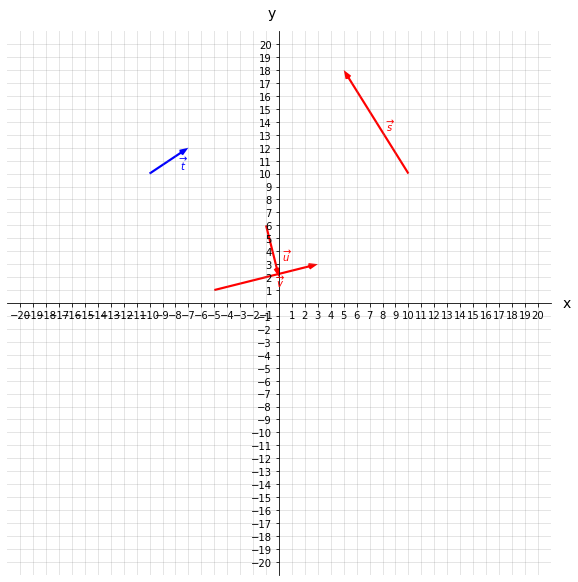

In [6]:
# Ejemplo de uso

fig, ax =dibujar_ejes(20)    

# datos en listas
X,Y,U,V,T = [-1,-5],[6,1],[1,8],[-4,2],['u','v']   
añadir_vectores(X,Y,U,V,T,fig,ax)
añadir_vectores([10],[10],[-5],[8],['s'],fig,ax)
# datos en enteros
añadir_vectores(-10,10,3,2,'t',fig,ax,'b')
plt.show()

**Representa y calcula las coordenadas de $\overrightarrow{u}+\overrightarrow{v}$**

'u'

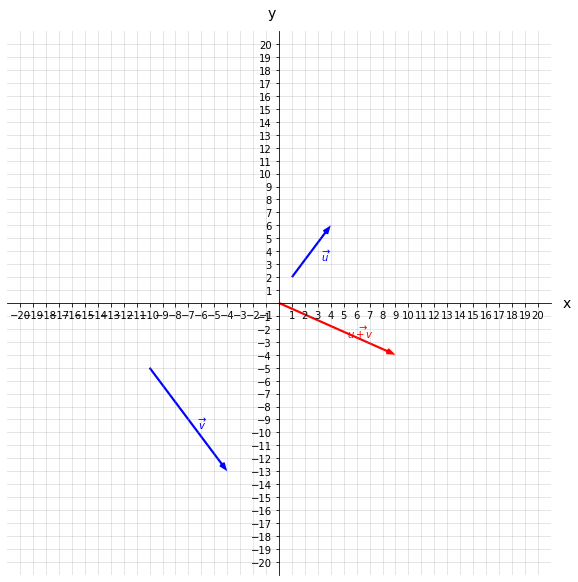

In [7]:
# Representar y calcular vectores suma

texto_ejercicio = r'Representa y calcula las coordenadas de $\overrightarrow{u}+\overrightarrow{v}$'

display(md("**"+texto_ejercicio+"**"))

datos = [       [[1,2,3,4, 'u'],[-10,-5,6,-8, 'v']],                    
    
                    ]


for d in datos :
    display(d[0][4])
    fig, ax =dibujar_ejes(20)
    for v in d:
        X, Y, U, V, T = v
        añadir_vectores(X, Y, U, V, T,fig,ax,'b')
    sol=[x + y for x, y in zip(d[0],d[1])][-3:-1]
    U,V=sol
    añadir_vectores(0, 0, U, V, 'u+v',fig,ax,'r')
    display(Point(sol))
        
    
#     p1.save('sistema_ine_ex{}.png'.format(j))
#     p1.show()
#     mostrar_ejercicio(r"$"+sist_latex+r"$",r"""\scalebox{.99}{\includegraphics[width=1\columnwidth]{sistema_ine_ex"""+latex(j)+r""".png}}""")
#     lista.append([r"$"+sist_latex+r"$",r"""\scalebox{.99}{\includegraphics[width=1\columnwidth]{sistema_ine_ex"""+latex(j)+r""".png}}"""])
    
# print(latex_exam('Resuelve el siguiente sistema de inecuaciones con dos incógnitas:',lista))

In [8]:
# Calcular el punto medio

texto_ejercicio = 'Calcula el punto medio del segmento que une los puntos:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(-5,0),(3,7)]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "$A"+latex(i[0])+" y \ B"+latex(i[1])+"$ "
#     enun = enun.replace(r'[',r'(').replace(r']',r')')
    sol = "$M"+latex(list(Point(i[0]).midpoint(Point(i[1]))))+"$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula el punto medio del segmento que une los puntos:**

#### Ejercicio:

$A\left( -5, \  0\right) y \ B\left( 3, \  7\right)$  $\to$ $M\left( -1, \  \frac{7}{2}\right)$

enunciado_latex: $A\left( -5, \  0\right) y \ B\left( 3, \  7\right)$ 
solucion_latex: $M\left( -1, \  \frac{7}{2}\right)$
\question Calcula el punto medio del segmento que une los puntos:\begin{parts} \part[1] $A\left( -5, \  0\right) y \ B\left( 3, \  7\right)$ \begin{solution} $M\left( -1, \  \dfrac{7}{2}\right)$\end{solution} \end{parts} 


In [9]:
# Calcular el punto simétrico

texto_ejercicio = 'Calcula el punto medio del segmento que une los puntos:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(-5,0),(3,7)]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "$A"+latex(i[0])+" y \ B"+latex(i[1])+"$ "
#     enun = enun.replace(r'[',r'(').replace(r']',r')')
    sol = "$M"+latex(list(Point(i[0]).midpoint(Point(i[1]))))+"$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula el punto medio del segmento que une los puntos:**

#### Ejercicio:

$A\left( -5, \  0\right) y \ B\left( 3, \  7\right)$  $\to$ $M\left( -1, \  \frac{7}{2}\right)$

enunciado_latex: $A\left( -5, \  0\right) y \ B\left( 3, \  7\right)$ 
solucion_latex: $M\left( -1, \  \frac{7}{2}\right)$
\question Calcula el punto medio del segmento que une los puntos:\begin{parts} \part[1] $A\left( -5, \  0\right) y \ B\left( 3, \  7\right)$ \begin{solution} $M\left( -1, \  \dfrac{7}{2}\right)$\end{solution} \end{parts} 


In [10]:
# Calcular el punto simétrico

texto_ejercicio = 'Calcula el punto simétrico:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(-7,-15),(2,0)]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "De $A"+latex(i[0])+"$ respecto  de  $M"+latex(i[1])+"$ "
#     enun = enun.replace(r'[',r'(').replace(r']',r')')
    A,M = map(Point, i)
    B=(x,y)
    sol = "$"+latex(Eq(A.midpoint(B),M))+r"\to A'\left("+",".join([latex(i[0]) for i in list(map(solve,list(A.midpoint(B)-M)))])+r"\right)$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula el punto simétrico:**

#### Ejercicio:

De $A\left( -7, \  -15\right)$ respecto  de  $M\left( 2, \  0\right)$  $\to$ $Point2D\left(\frac{x}{2} - \frac{7}{2}, \frac{y}{2} - \frac{15}{2}\right) = Point2D\left(2, 0\right)\to A'\left(11,15\right)$

enunciado_latex: De $A\left( -7, \  -15\right)$ respecto  de  $M\left( 2, \  0\right)$ 
solucion_latex: $Point2D\left(\frac{x}{2} - \frac{7}{2}, \frac{y}{2} - \frac{15}{2}\right) = Point2D\left(2, 0\right)\to A'\left(11,15\right)$
\question Calcula el punto simétrico:\begin{parts} \part[1] De $A\left( -7, \  -15\right)$ respecto  de  $M\left( 2, \  0\right)$ \begin{solution} $Point2D\left(\dfrac{x}{2} - \dfrac{7}{2}, \dfrac{y}{2} - \dfrac{15}{2}\right) = Point2D\left(2, 0\right)\to A'\left(11,15\right)$\end{solution} \end{parts} 


In [11]:
# Calcular el punto simétrico

texto_ejercicio = 'Halla las coordenadas del punto D, de modo que ABCD sea un paralelogramo siendo'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(1, -1), (0, 2), (6, 5)]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = "Siendo $A$, $B$ y $C$ respectivamente: $"+" $, $".join(map(latex,i))+"$"
    A, B, C = map(Point,i)
    D = Point(x,y)
    sol=r"$\overrightarrow{AB} = \overrightarrow{DC} \to "+latex(Eq(B-A, C-D))+r" \to D"
    sol += latex([i[0] for i in list(map(solve,list(B-A-C+D)))])+"$"
    sol=sol.replace(r'[',r'(').replace(r']',r')')
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Halla las coordenadas del punto D, de modo que ABCD sea un paralelogramo siendo**

#### Ejercicio:

Siendo $A$, $B$ y $C$ respectivamente: $\left( 1, \  -1\right) $, $\left( 0, \  2\right) $, $\left( 6, \  5\right)$ $\to$ $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(-1, 3\right) = Point2D\left(6 - x, 5 - y\right) \to D\left( 7, \  2\right)$

enunciado_latex: Siendo $A$, $B$ y $C$ respectivamente: $\left( 1, \  -1\right) $, $\left( 0, \  2\right) $, $\left( 6, \  5\right)$
solucion_latex: $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(-1, 3\right) = Point2D\left(6 - x, 5 - y\right) \to D\left( 7, \  2\right)$
\question Halla las coordenadas del punto D, de modo que ABCD sea un paralelogramo siendo\begin{parts} \part[1] Siendo $A$, $B$ y $C$ respectivamente: $\left( 1, \  -1\right) $, $\left( 0, \  2\right) $, $\left( 6, \  5\right)$\begin{solution} $\overrightarrow{AB} = \overrightarrow{DC} \to Point2D\left(-1, 3\right) = Point2D\left(6 - x, 5 - y\right) \to D\left( 7, \  2\right)$\end{solution} \end{parts} 


In [12]:
def Linea(expr) :
    eq = eval(str(parse_latex(expr)))
    p1 = Point(0,nsimplify(solve(Eq(eq.args[0].subs(x,0),eq.args[1].subs(x,0)),y)[0]))
    p2 = Point(1,nsimplify(solve(Eq(eq.args[0].subs(x,1),eq.args[1].subs(x,1)),y)[0]))
    
    return Line(p1,p2)

#uso Linea('3x+y=0')


In [13]:
# Calcular rectas

texto_ejercicio = 'Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(3, -2), (-1, 5)]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $"+" $, $".join(map(latex,i))+"$"
    P, d = map(Point,i)
    r=Line(P, P+d)
    sol=r"Solución aproximada a falta de manipular expresiones: $"+latex(Eq(Point(x,y),(r.arbitrary_point())))+r" \to "
    sol += latex(r.equation())+r" \to "+latex(Eq(y,solve(r.equation(y=y),y)[0]))+"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:**

#### Ejercicio:

Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 3, \  -2\right) $, $\left( -1, \  5\right)$ $\to$ Solución aproximada a falta de manipular expresiones: $Point2D\left(x, y\right) = Point2D\left(3 - t, 5 t - 2\right) \to - 5 x - y + 13 \to y = 13 - 5 x$

enunciado_latex: Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 3, \  -2\right) $, $\left( -1, \  5\right)$
solucion_latex: Solución aproximada a falta de manipular expresiones: $Point2D\left(x, y\right) = Point2D\left(3 - t, 5 t - 2\right) \to - 5 x - y + 13 \to y = 13 - 5 x$
\question Escribe las ecuaciones vectorial, paramétricas, en forma continua y explícita de la recta que:\begin{parts} \part[1] Pasa por el punto $P$ y tiene por vector dirección $\overrightarrow{d}$ respectivamente: $\left( 3, \  -2\right) $, $\left( -1, \  5\right)$\begin{solution} Solución aproximada a falta de manipular expresiones: $Point2D\left(x, y\right) = Point2D\left(3 - t, 5 t - 2\right) \to - 5 x - y + 13 \to y = 13 - 5 x$\end{solution} \end{parts} 


In [30]:
# Calcular rectas paralelas

texto_ejercicio = 'Calcula la recta $s$ que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(-3, 2), 8*x-3*y+6]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"pasa por P${}$ y es paralela a $r \equiv {} = 0$".format(latex(i[0]),latex(i[1]))
    s=Line(i[1]).parallel_line(Point(i[0]))
    sol=r"$s\equiv "+latex(Eq(y,solve(s.equation(y=y),y)[0]))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula la recta $s$ que:**

#### Ejercicio:

pasa por P$\left( -3, \  2\right)$ y es paralela a $r \equiv 8 x - 3 y + 6 = 0$ $\to$ $s\equiv y = \frac{8 x}{3} + 10$

enunciado_latex: pasa por P$\left( -3, \  2\right)$ y es paralela a $r \equiv 8 x - 3 y + 6 = 0$
solucion_latex: $s\equiv y = \frac{8 x}{3} + 10$
\question Calcula la recta $s$ que:\begin{parts} \part[1] pasa por P$\left( -3, \  2\right)$ y es paralela a $r \equiv 8 x - 3 y + 6 = 0$\begin{solution} $s\equiv y = \dfrac{8 x}{3} + 10$\end{solution} \end{parts} 


In [27]:
# Calcular rectas y cortes

texto_ejercicio = 'Calcula la recta $s$ que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(-3, 2), 8*x-3*y+6]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"pasa por P${}$ y es perpendicular a $r \equiv {} = 0$".format(latex(i[0]),latex(i[1]))
    s=Line(i[1]).perpendicular_line(Point(i[0]))
    sol=r"$s\equiv "+latex(Eq(y,solve(s.equation(y=y),y)[0]))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcula la recta $s$ que:**

#### Ejercicio:

pasa por P$\left( -3, \  2\right)$ y es perpendicular a $r \equiv 8 x - 3 y + 6 = 0$ $\to$ $s\equiv y = \frac{7}{8} - \frac{3 x}{8}$

enunciado_latex: pasa por P$\left( -3, \  2\right)$ y es perpendicular a $r \equiv 8 x - 3 y + 6 = 0$
solucion_latex: $s\equiv y = \frac{7}{8} - \frac{3 x}{8}$
\question Calcula la recta $s$ que:\begin{parts} \part[1] pasa por P$\left( -3, \  2\right)$ y es perpendicular a $r \equiv 8 x - 3 y + 6 = 0$\begin{solution} $s\equiv y = \dfrac{7}{8} - \dfrac{3 x}{8}$\end{solution} \end{parts} 


In [26]:
# Calcular rectas y cortes

texto_ejercicio = 'Obtén las ecuaciones de las rectas $r$ y $s$ y su punto de intersección sabiendo que:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
    [(-3, 2), 8*x-3*y+6, (9, -5/2), 2*x+y-7]
                      ]
question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun = r"r pasa por ${}$ y es perpendicular a ${} = 0$. Y s pasa por ${}$ y es paralela a ${}= 0$".format(latex(i[0]),latex(i[1]),latex(i[2]),latex(i[3]))
    r=Line(i[1]).perpendicular_line(Point(i[0]))
    Eq(y,solve(r.equation(y=y),y)[0])

    s=Line(i[3]).parallel_line(Point(i[2]))
    Eq(y,solve(s.equation(y=y),y)[0])
    sol=r"Solución: \\ $r\equiv "+latex(r.equation())+r"$ \\ $s\equiv "+latex(Eq(y,solve(r.equation(y=y),y)[0]))+r"\to  $$"+latex(r.intersection(s))+r" $ "
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])         

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Obtén las ecuaciones de las rectas $r$ y $s$ y su punto de intersección sabiendo que:**

#### Ejercicio:

r pasa por $\left( -3, \  2\right)$ y es perpendicular a $8 x - 3 y + 6 = 0$. Y s pasa por $\left( 9, \  -2.5\right)$ y es paralela a $2 x + y - 7= 0$ $\to$ Solución: \\ $r\equiv - x - \frac{8 y}{3} + \frac{7}{3}$ \\ $s\equiv y = \frac{7}{8} - \frac{3 x}{8}\to  $$\left[ Point2D\left(9, - \frac{5}{2}\right)\right] $ 

enunciado_latex: r pasa por $\left( -3, \  2\right)$ y es perpendicular a $8 x - 3 y + 6 = 0$. Y s pasa por $\left( 9, \  -2.5\right)$ y es paralela a $2 x + y - 7= 0$
solucion_latex: Solución: \\ $r\equiv - x - \frac{8 y}{3} + \frac{7}{3}$ \\ $s\equiv y = \frac{7}{8} - \frac{3 x}{8}\to  $$\left[ Point2D\left(9, - \frac{5}{2}\right)\right] $ 
\question Obtén las ecuaciones de las rectas $r$ y $s$ y su punto de intersección sabiendo que:\begin{parts} \part[1] r pasa por $\left( -3, \  2\right)$ y es perpendicular a $8 x - 3 y + 6 = 0$. Y s pasa por $\left( 9, \  -2.5\right)$ y es paralela a $2 x + y - 7= 0$\begin{solution} Solución: \\ $r\equiv - x - \dfrac{8 y}{3} + \dfrac{7}{3}$ \\ $s\equiv y = \dfrac{7}{8} - \dfrac{3 x}{8}\to  $$\left[ Point2D\left(9, - \dfrac{5}{2}\right)\right] $ \end{solution} \end{parts} 


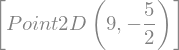

In [21]:
i=[(-3, 2), 8*x-3*y+6, (9, -5/2), 2*x+y-7]

r=Line(i[1]).perpendicular_line(Point(i[0]))
Eq(y,solve(r.equation(y=y),y)[0])

s=Line(i[3]).parallel_line(Point(i[2]))
Eq(y,solve(s.equation(y=y),y)[0])

r.intersection(s)



In [ ]:
r=Linea('8x-3y+6=0')


r.p1, r.direction

Line?
